### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd
import os

data_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))+'/data/'

processed_data = pd.read_csv(data_path+'processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km
id,,,,,
id2875421,1,930.399753,0,455.0,1.500479
id2377394,0,930.399753,0,663.0,1.807119
id3858529,1,930.399753,0,2124.0,6.392080
id3504673,1,930.399753,0,429.0,1.487155
id2181028,1,930.399753,0,435.0,1.189925


In [2]:
processed_data.shape

(1458644, 5)

In [3]:
initial_data = pd.read_csv(data_path+'taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [4]:
initial_data.shape[0] == processed_data.shape[0]

True

In [5]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [6]:
processed_data.shape

(1458644, 6)

Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [7]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month
processed_data['log_trip_duration'] = np.log1p(processed_data['trip_duration'])
processed_data.drop('trip_duration', axis=1, inplace=True)

In [8]:
processed_data.shape

(1458644, 10)

Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

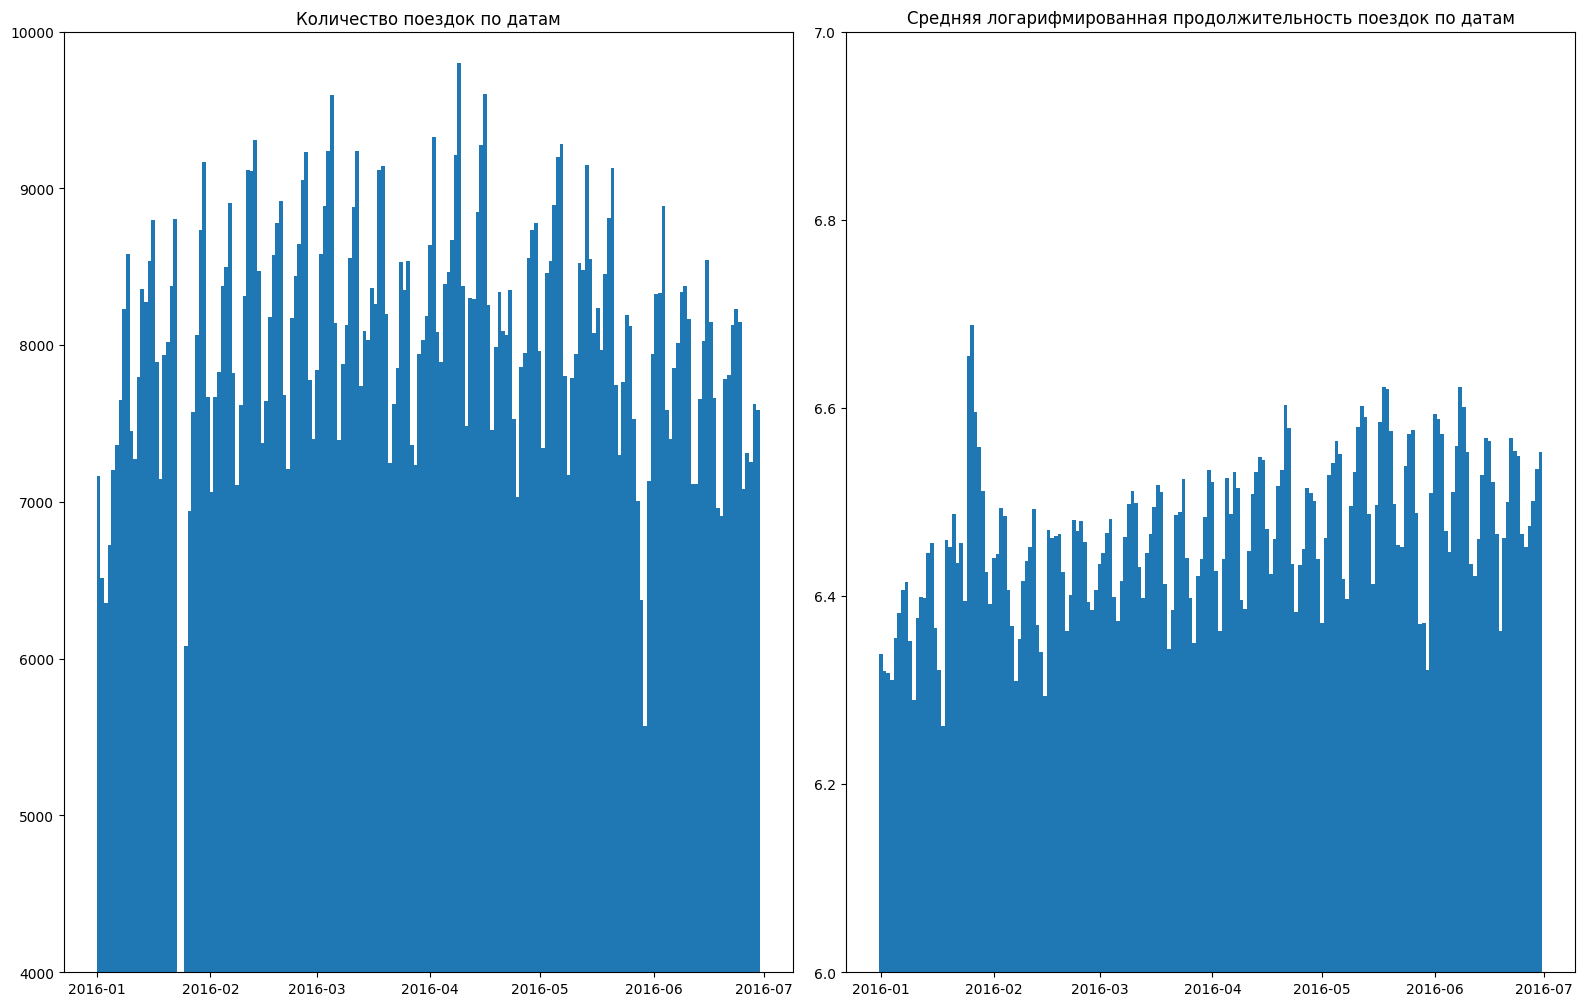

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


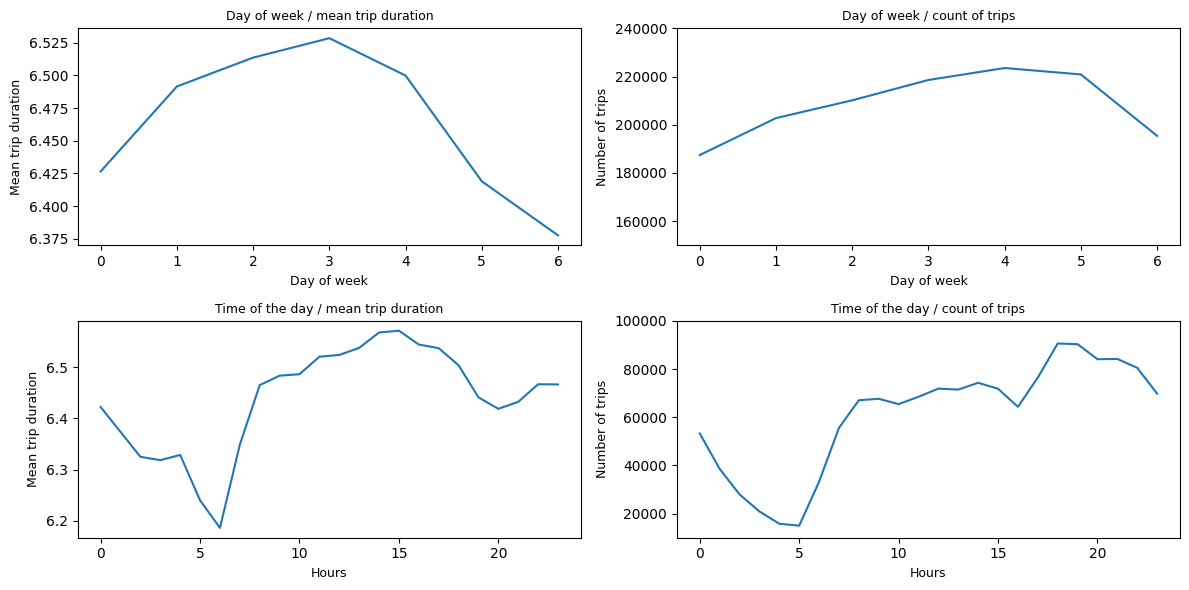

In [10]:
day_of_week_mean = processed_data.groupby('day_of_week')['log_trip_duration'].mean()
day_of_week_count = processed_data.groupby('day_of_week')['log_trip_duration'].count()
hour_of_day_mean = processed_data.groupby('hour')['log_trip_duration'].mean()
hour_of_day_count = processed_data.groupby('hour')['log_trip_duration'].count()

fig, ax = plt.subplots(2,2, figsize=(12,6))

ax[0,0].plot(day_of_week_mean.index, day_of_week_mean)
ax[0,0].set_title('Day of week / mean trip duration', size=9)
ax[0,0].set_xlabel('Day of week', size=9)
ax[0,0].set_ylabel('Mean trip duration', size=9)
ax[0,1].plot(day_of_week_count.index, day_of_week_count)
ax[0,1].set_title('Day of week / count of trips', size=9)
ax[0,1].set_xlabel('Day of week', size=9)
ax[0,1].set_ylabel('Number of trips', size=9)
ax[0,1].set_ylim([150000,240000])
ax[1,0].plot(hour_of_day_mean.index, hour_of_day_mean)
ax[1,0].set_title('Time of the day / mean trip duration', size=9)
ax[1,0].set_xlabel('Hours', size=9)
ax[1,0].set_ylabel('Mean trip duration', size=9)
ax[1,1].plot(hour_of_day_count.index, hour_of_day_count)
ax[1,1].set_title('Time of the day / count of trips', size=9)
ax[1,1].set_xlabel('Hours', size=9)
ax[1,1].set_ylabel('Number of trips', size=9)
ax[1,1].set_ylim([10000, 100000])

fig.tight_layout()
plt.show()

In [11]:
average_trip_day_week = processed_data.groupby(['hour', 'day_of_week'])['log_trip_duration'].mean()

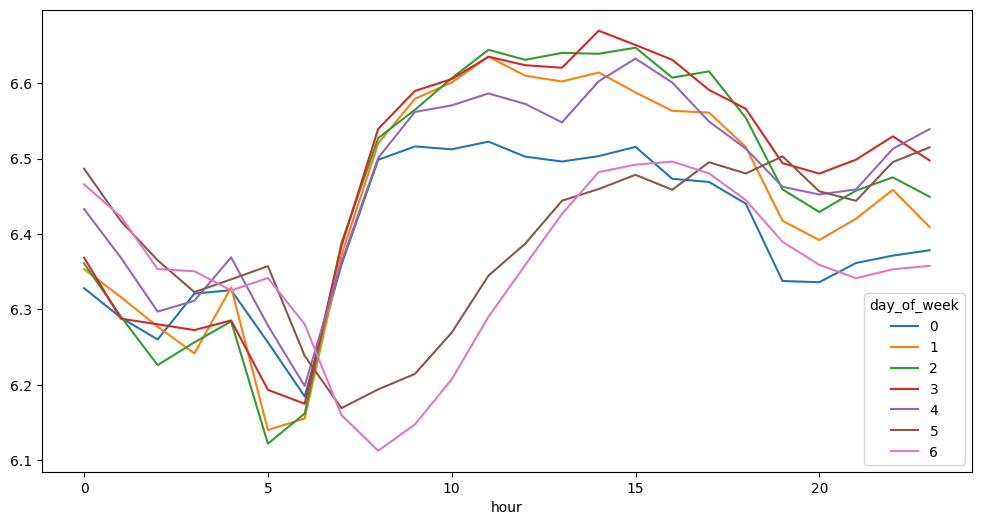

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
average_trip_day_week.unstack().plot(ax=ax)
plt.show()

In [13]:
averge_trip_day_month = processed_data.groupby(['day_of_week', 'month'])['log_trip_duration'].mean()

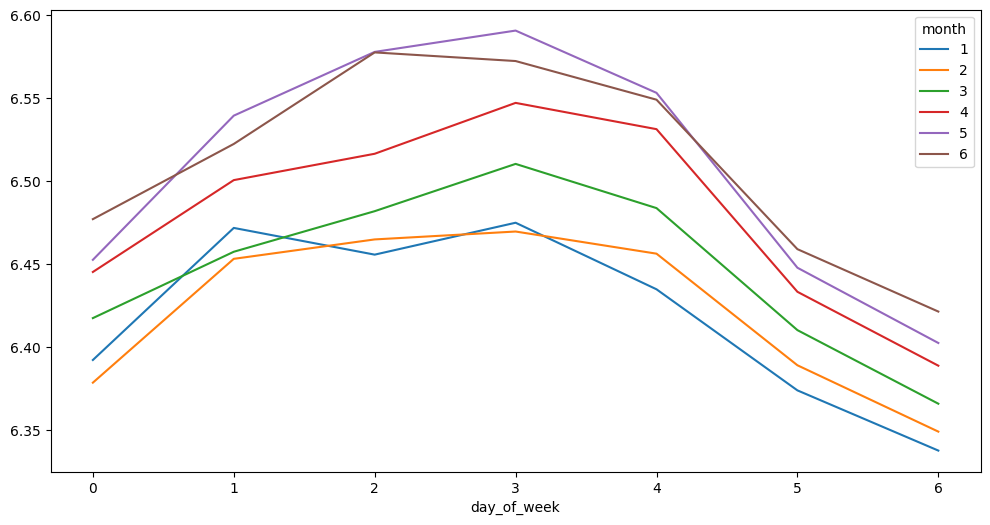

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
averge_trip_day_month.unstack().plot(ax=ax)
plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [15]:
processed_data['date'] = pd.to_datetime(processed_data['date'])

In [16]:
### Создадим первый бинарный признак
def anomaly(x):
    if x['date'] == pd.Timestamp('2016-01-23'):
        return 1
    else:
        return 0

processed_data['anomaly'] = processed_data.apply(anomaly, axis=1)

In [17]:
### Создадим второй бинарный признак
jam_grouped = pd.DataFrame(processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean())

In [18]:
jam_threshold = jam_grouped.sort_values('log_trip_duration', ascending=False)
jam_threshold.iloc[:10]

log_trip_duration
day_of_week hour                   
3           14             6.669526
            15             6.650622
2           15             6.647091
            11             6.644226
            13             6.640205
            14             6.638930
1           11             6.635141
3           11             6.635055
4           15             6.632537
3           16             6.630965

In [19]:
list_jam_factor = jam_threshold.iloc[:9].reset_index()['hour'].unique()

In [20]:
def traffic_jam(x):
    check_list = list_jam_factor
    if x['hour'] in check_list:
        return 1
    else:
        return 0
    
processed_data['traffic_jam'] = processed_data.apply(traffic_jam, axis=1)
    

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [21]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [22]:
### Делаем OneHotEncoding и конкатим с processed_data
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(drop='first')

# processed_data_enc = processed_data.copy()

# for i in ['day_of_week','hour', 'month']:
#     enc.fit(processed_data[[i]])
#     encoded_col = enc.transform(processed_data[[i]]).toarray()
#     cols = enc.get_feature_names_out()
#     encoded_df = pd.DataFrame(encoded_col, columns=cols, index=processed_data.index)
#     processed_data_enc = pd.merge(processed_data_enc, encoded_df, left_index=True, right_index=True)
#     processed_data_enc.drop(i,axis=1, inplace=True)



In [23]:
### Делаем OneHotEncoding и конкатим с processed_data

processed_data_enc = processed_data.copy()

for col in ['day_of_week', 'hour', 'month']:
    processed_data_enc = pd.concat([processed_data_enc,
                                pd.get_dummies(processed_data_enc[col], drop_first = True, prefix = f"{col}")],
                               axis = 1)
    processed_data_enc.drop(columns = col, inplace = True)
    

In [24]:
processed_data_enc.shape

(1458644, 41)

In [25]:
processed_data_enc.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'distance_km',
       'log_trip_duration', 'anomaly', 'traffic_jam', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')

In [26]:
processed_data_enc[:5].to_csv('task7_4.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [25]:
### Your code is here
np.corrcoef(processed_data_enc['distance_km'], processed_data_enc['passenger_count'])


array([[1.        , 0.01659589],
       [0.01659589, 1.        ]])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [27]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

X = processed_data_enc.drop('log_trip_duration', axis=1)
y = processed_data_enc['log_trip_duration']

lin_model = LinearRegression()
sfs = SequentialFeatureSelector(lin_model, n_features_to_select=5)
sfs.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [28]:
### Перечислите фичи, которые окажутся наиболее желанными
final_cols = sfs.get_feature_names_out()

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

X_final = processed_data_enc[final_cols]

lin_model.fit(X_final, y)
final_predictions = lin_model.predict(X_final)
lin_mse = mean_squared_error(y, final_predictions)
lin_mse


0.4154936368708363